# Descriptive Statistics

This file provides descriptive statistics and visualizations of the main variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bb = pd.read_csv('bbNoText_pop.csv')

# Describe the data rounded to two decimals
bb.describe().round(3)

# Export table as csv
#bb.describe().round(3).to_csv('bbNoText_describe.csv')

,Year,District,econ_index,econ_index_change,econ_index_change_dummy,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram,variance_sentiment,commodities,spending,credit,labor,real_estate,population
count,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000
mean,2001.399,7.001,88.955,0.314,0.853,0.868,0.128,0.090,0.445,0.144,0.118,0.033,0.015,0.067,0.006,0.111,43617.463
std,13.061,3.741,28.431,1.231,0.354,0.446,0.081,0.119,0.107,0.258,0.029,0.161,0.111,0.218,0.102,0.240,71142.422
min,1979.000,1.000,38.785,-31.871,0.000,-0.998,-0.198,-0.270,0.000,-0.809,0.039,-0.883,-0.883,-0.836,-0.758,-0.832,7192.900
25%,1990.000,4.000,64.774,0.155,1.000,0.988,0.076,0.000,0.382,0.000,0.098,0.000,0.000,0.000,0.000,0.000,13551.756
50%,2001.000,7.000,88.525,0.336,1.000,0.996,0.132,0.000,0.440,0.105,0.116,0.000,0.000,0.000,0.000,0.000,21564.934
75%,2013.000,10.000,106.002,0.561,1.000,0.998,0.182,0.178,0.510,0.326,0.135,0.000,0.000,0.000,0.000,0.273,33304.640
max,2024.000,13.000,170.457,13.438,1.000,1.000,0.401,0.527,0.994,0.946,0.271,0.917,0.848,0.946,0.888,0.908,334869.473


In [3]:
bbVars = bb[['econ_index', 'econ_index_change_dummy','compound_score','mean_sentiment', 'median_sentiment','IQR_sentiment','commodities','credit','labor','real_estate','spending','population','District','Year','Date']]

bbVars.describe().round(3)

,econ_index,econ_index_change_dummy,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,commodities,credit,labor,real_estate,spending,population,District,Year
count,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000,4700.000
mean,88.955,0.853,0.868,0.128,0.090,0.445,0.033,0.067,0.006,0.111,0.015,43617.463,7.001,2001.399
std,28.431,0.354,0.446,0.081,0.119,0.107,0.161,0.218,0.102,0.240,0.111,71142.422,3.741,13.061
min,38.785,0.000,-0.998,-0.198,-0.270,0.000,-0.883,-0.836,-0.758,-0.832,-0.883,7192.900,1.000,1979.000
25%,64.774,1.000,0.988,0.076,0.000,0.382,0.000,0.000,0.000,0.000,0.000,13551.756,4.000,1990.000
50%,88.525,1.000,0.996,0.132,0.000,0.440,0.000,0.000,0.000,0.000,0.000,21564.934,7.000,2001.000
75%,106.002,1.000,0.998,0.182,0.178,0.510,0.000,0.000,0.000,0.273,0.000,33304.640,10.000,2013.000
max,170.457,1.000,1.000,0.401,0.527,0.994,0.917,0.946,0.888,0.908,0.848,334869.473,13.000,2024.000


In [4]:
# sort by 'District' and 'Year'
bb_sorted = bbVars.sort_values(by=['District', 'Year'])

# Selecting columns I want stats for
selected_columns = ['econ_index', 'econ_index_change_dummy','compound_score','mean_sentiment', 'median_sentiment','IQR_sentiment','commodities','credit','labor','real_estate','spending','population','District','Year','Date']

# Descriptive statistics by District
district_stats = bb_sorted.groupby('District')[selected_columns].describe()

# Descriptive statistics by Year
year_stats = bb_sorted.groupby('Year')[selected_columns].describe()


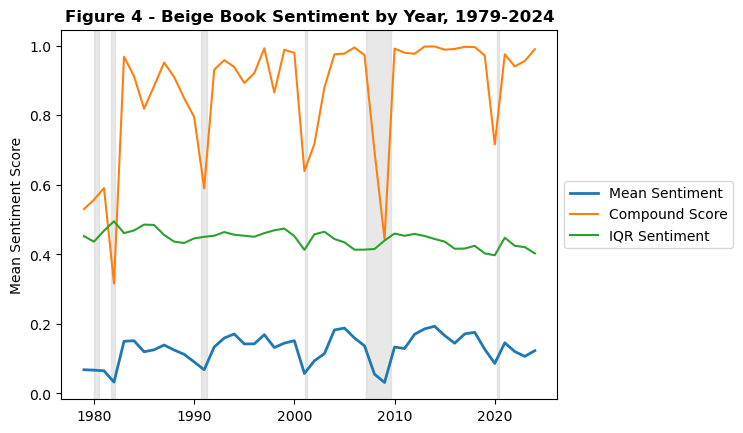

In [5]:
# Plot each of the sentiment metrics by year
    # Comment some of these out to simplify the plot for export
bb_sorted.groupby('Year')['mean_sentiment'].mean().plot(linewidth=2)
#bb_sorted.groupby('Year')['sentiment_trigram'].mean().plot()
bb_sorted.groupby('Year')['compound_score'].mean().plot()
bb_sorted.groupby('Year')['IQR_sentiment'].mean().plot()

# Plot recessions with gray bars from January 1980 to July 1980
plt.axvspan(1980, 1980.5, color='lightgray', alpha=0.5)
plt.axvspan(1981.7, 1982.11, color='lightgray', alpha=0.5)
plt.axvspan(1990.7, 1991.3, color='lightgray', alpha=0.5)
plt.axvspan(2001.3, 2001.11, color='lightgray', alpha=0.5)
plt.axvspan(2007.12, 2009.6, color='lightgray', alpha=0.5)
plt.axvspan(2020.2, 2020.4, color='lightgray', alpha=0.5)
# Add a title
plt.title('Figure 4 - Beige Book Sentiment by Year, 1979-2024', fontweight='bold')
# Remove X axis label
plt.xlabel('')
# Add Y axis label
plt.ylabel('Mean Sentiment Score')
# Remove vertical and horizontal gridlines
plt.grid(False)

# Place legend to the right of the plot
plt.legend(['Mean Sentiment', 'Compound Score', 'IQR Sentiment'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Fig4_bb_sentiment_by_year.png', dpi=300, bbox_inches='tight')

In [6]:
# Save date as datetime
bb['Date'] = pd.to_datetime(bb['Date'])

# Sort by date
bb = bb.sort_values(by='Date')

compound_by_date = bb.groupby('Date')['compound_score'].mean()

# Export csv
compound_by_date.to_csv('compound_by_date.csv')

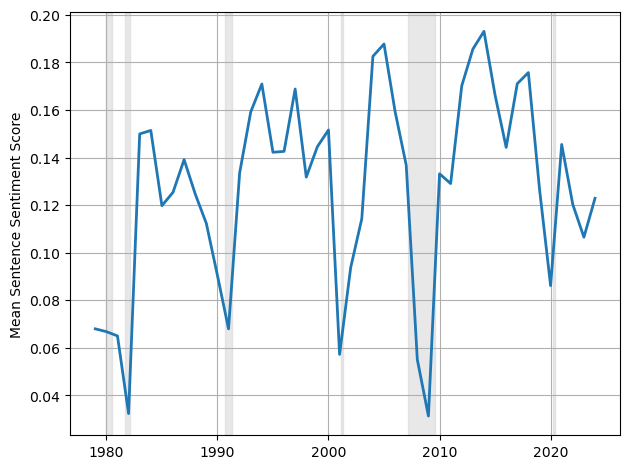

In [ ]:
# Plot mean sentiment  by year
    
bb_sorted.groupby('Year')['mean_sentiment'].mean().plot(linewidth=2)

# Plot recessions with gray bars from January 1980 to July 1980
plt.axvspan(1980, 1980.5, color='lightgray', alpha=0.5)
plt.axvspan(1981.7, 1982.11, color='lightgray', alpha=0.5)
plt.axvspan(1990.7, 1991.3, color='lightgray', alpha=0.5)
plt.axvspan(2001.3, 2001.11, color='lightgray', alpha=0.5)
plt.axvspan(2007.12, 2009.6, color='lightgray', alpha=0.5)
plt.axvspan(2020.2, 2020.4, color='lightgray', alpha=0.5)

# Remove X axis label
plt.xlabel('')
# Add Y axis label
plt.ylabel('Mean Sentence Sentiment Score')
# Remove vertical gridlines
plt.grid()

# Remove whitespace from the top
plt.tight_layout()

# Save the plot at 300 DPI
plt.savefig('mean_bb_sentiment_by_year.png', dpi=300)

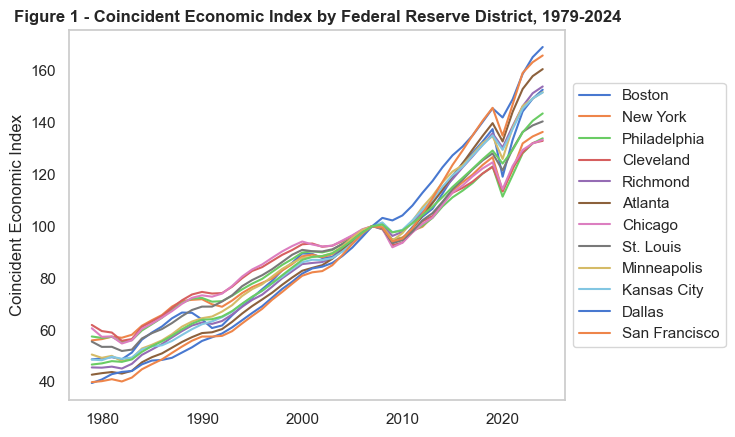

In [46]:
# Plot econ_index by grouping by district over time
# Draw a different line for each district
bb_sorted.groupby(['Year', 'District'])['econ_index'].mean().unstack().plot()
# Add a title
plt.title('Figure 1 - Coincident Economic Index by Federal Reserve District, 1979-2024', fontweight='bold')

# Remove X axis label
plt.xlabel('')

# Add Y axis label
plt.ylabel('Coincident Economic Index')

# Remove gridlines
plt.grid(False)

# Move legend to the right of plot and rename the labels
plt.legend(['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco'], loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot at 300 DPI and don't cut off the end
plt.savefig('Figure_1_econ_index_by_district.png', dpi=300, bbox_inches='tight')


In [7]:
predictors = ['compound_score', 'mean_sentiment', 'IQR_sentiment', 'sentiment_trigram']
DVs = ['USPHCI', 'econ_index_change_dummy', 'econ_index', 'econ_index_change']


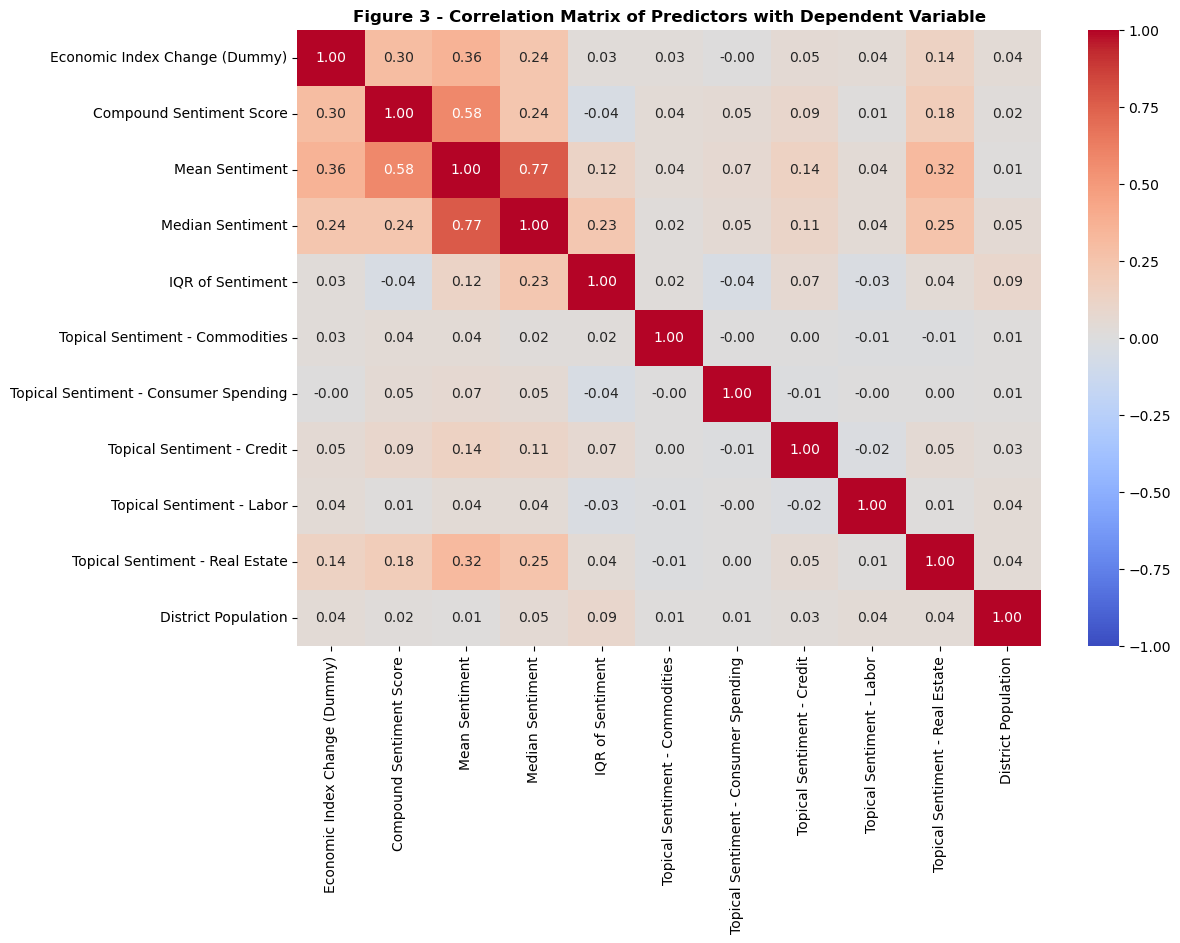

In [8]:
# Correlation between predictors and DV
predictorsDV = ['econ_index_change_dummy','compound_score', 'mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'commodities', 'spending', 'credit', 'labor', 'real_estate', 'population']

# Define a dictionary for more readable names
readable_names = {
    'econ_index_change_dummy': 'Economic Index Change (Dummy)',
    'compound_score': 'Compound Sentiment Score',
    'mean_sentiment': 'Mean Sentiment',
    'median_sentiment': 'Median Sentiment',
    'IQR_sentiment': 'IQR of Sentiment',
    'commodities': 'Topical Sentiment - Commodities',
    'spending': 'Topical Sentiment - Consumer Spending',
    'credit': 'Topical Sentiment - Credit',
    'labor': 'Topical Sentiment - Labor',
    'real_estate': 'Topical Sentiment - Real Estate',
    'population': 'District Population'
}

# Rename predictors to more readable names in the DataFrame
bb_readable = bb[predictorsDV].rename(columns=readable_names)

# Correlations between predictors and dependent variable
correlation_matrix = bb_readable.corr().round(2)

# Create a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Figure 3 - Correlation Matrix of Predictors with Dependent Variable', fontweight='bold')

# Save and show the figure
plt.savefig('Figure_3_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


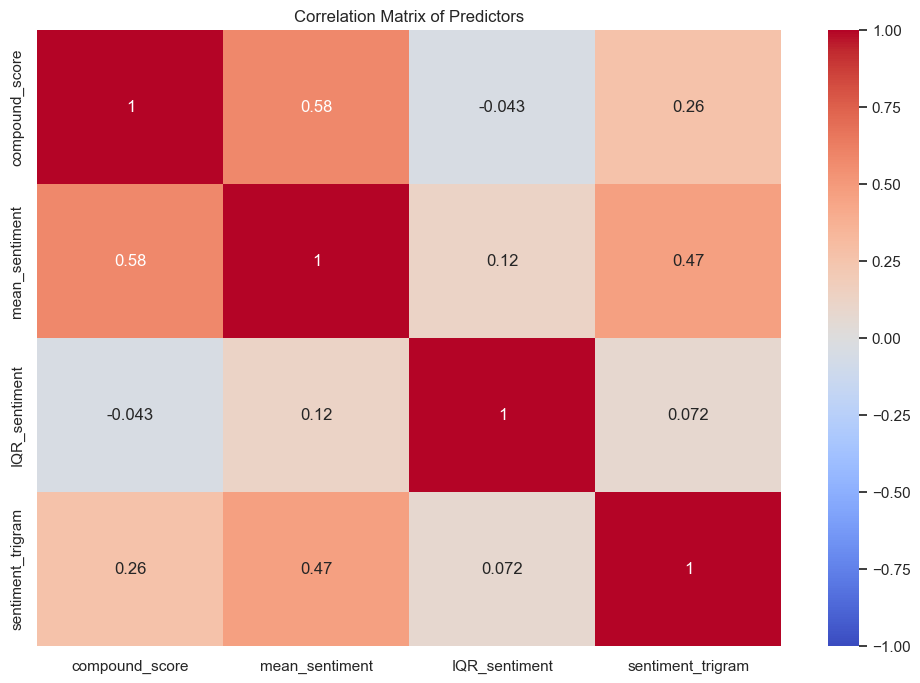

In [ ]:
# Correlations between predictors
bb[predictors].corr()

# Create a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(bb[predictors].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Predictors')
plt.show()

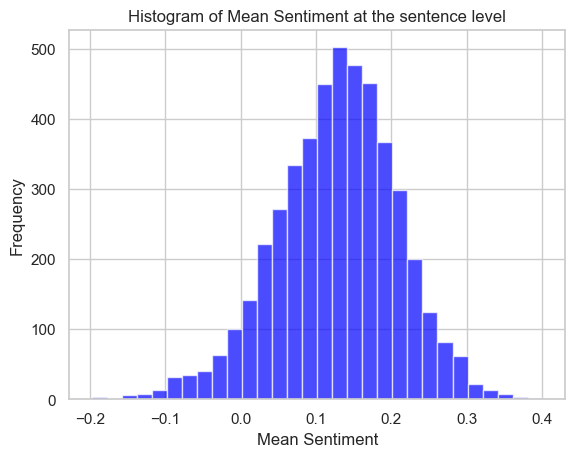

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'mean_sentiment' column
plt.hist(bb['mean_sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Mean Sentiment at the sentence level')
plt.xlabel('Mean Sentiment')
plt.ylabel('Frequency')
plt.show()


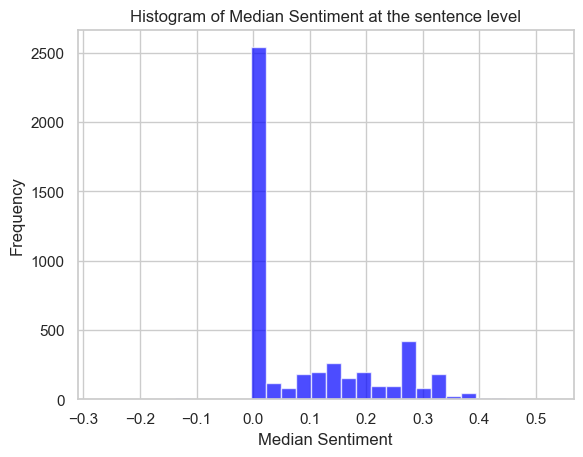

In [ ]:
# Plot a histogram for the 'median_sentiment' column
plt.hist(bb['median_sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Median Sentiment at the sentence level')
plt.xlabel('Median Sentiment')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count the occurrences where 'median_sentiment' is equal to 0
count_median_sentiment_zero = (bb['median_sentiment'] == 0).sum()

# Print the result
print(f"The number of times 'median_sentiment' equals 0 is: {count_median_sentiment_zero}")


The number of times 'median_sentiment' equals 0 is: 2352


In [ ]:
# Count the occurrences where 'trigram' is equal to 0
count_sentiment_trigram_zero = (bb['sentiment_trigram'] == 0).sum()

# Print the result
print(f"The number of times none of the 43 key trigrams are found in the document is: {count_sentiment_trigram_zero}")



The number of times none of the 43 key trigrams are found in the document is: 826


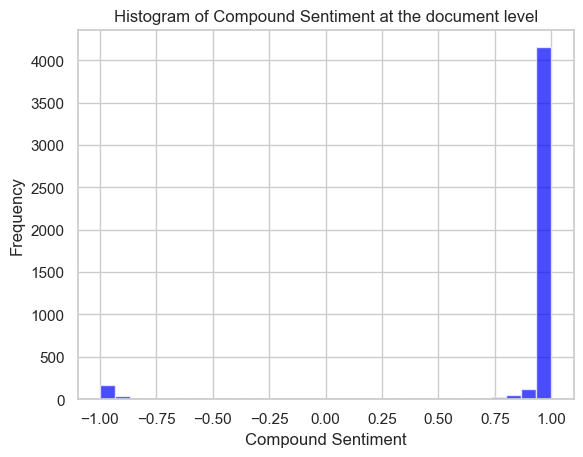

In [ ]:
# Plot a histogram for the 'compound_score' column
plt.hist(bb['compound_score'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Compound Sentiment at the document level')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.show()

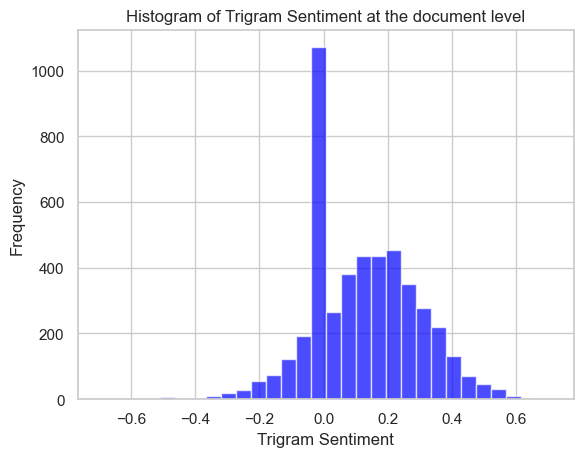

In [ ]:
# Plot a histogram for the 'sentiment_trigram' column
plt.hist(bb['sentiment_trigram'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Trigram Sentiment at the document level')
plt.xlabel('Trigram Sentiment')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation_predictors = ['compound_score', 'mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'sentiment_trigram']

# Create a correlation matrix
correlation_table = bb[correlation_predictors].corr()

# Print or display the correlation table
print("Correlation Table:")
correlation_table

Correlation Table:


,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram
compound_score,1.000000,0.584127,0.237611,-0.043246,0.264705
mean_sentiment,0.584127,1.000000,0.774078,0.118734,0.467196
median_sentiment,0.237611,0.774078,1.000000,0.226123,0.364461
IQR_sentiment,-0.043246,0.118734,0.226123,1.000000,0.072196
sentiment_trigram,0.264705,0.467196,0.364461,0.072196,1.000000


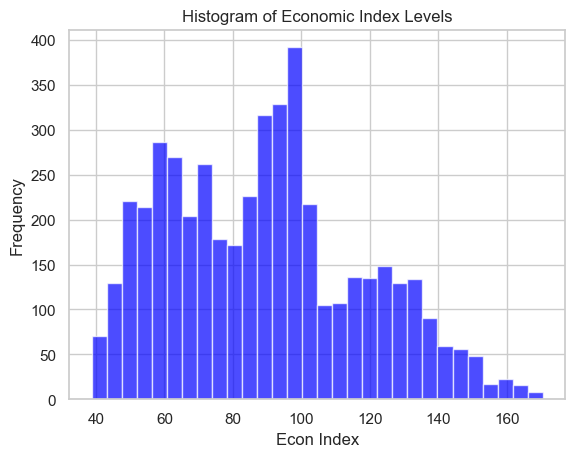

In [ ]:
# Plot a histogram for the 'econ_index' column
plt.hist(bb['econ_index'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Economic Index Levels')
plt.xlabel('Econ Index')
plt.ylabel('Frequency')
# Change the 'econ_index_change_dummy' column to a categorical type
bb['econ_index_change_dummy'] = bb['econ_index_change_dummy'].astype('category')plt.show()

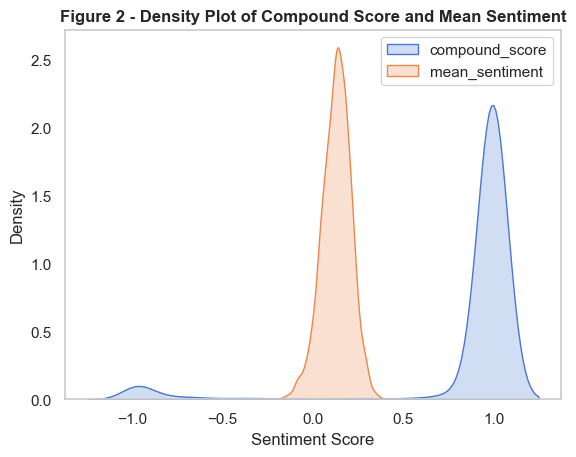

In [49]:
# Ridge plot showing the distribution of compound score and mean sentiment
#sns.set(style="whitegrid")
sns.kdeplot(data=bb[['compound_score', 'mean_sentiment']], fill=True)
# Change colors
sns.set_palette('muted')
plt.grid(False) # Removes gridlines
plt.title('Figure 2 - Density Plot of Compound Score and Mean Sentiment', fontweight='bold')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
# Export as 300 DPI PNG
plt.savefig('Figure_2_density_plot.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Change the 'econ_index_change_dummy' column to a categorical type
bb['econ_index_change_dummy'] = bb['econ_index_change_dummy'].astype('category')

bb['econ_index_change_dummy'].describe()

# Count the number of times each category occurs
bb['econ_index_change_dummy'].value_counts()




econ_index_change_dummy
1    4011
0     689
Name: count, dtype: int64

# Word counts

In [ ]:
import pandas as pd
bbText = pd.read_csv('bbText.csv')

# Count words per document
bbText['word_count'] = bbText['text'].apply(lambda x: len(x.split()))

In [ ]:
# Set display option to prevent scientific notation
pd.set_option('display.float_format', '{:,.2f}'.format)

bbText.describe()

,District,econ_index,compound_score,Year,MonthCode,MonthNumerical,mean_sentiment,median_sentiment,25th_quartile_sentiment,50th_quartile_sentiment,75th_quartile_sentiment,IQR_sentiment,variance_sentiment,sentiment_trigram,econ_index_change,econ_index_change_dummy,word_count
count,"4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,700.00","4,687.00","4,700.00","4,700.00"
mean,7.00,88.95,0.87,"2,001.40",4.50,6.62,0.13,0.09,-0.06,0.09,0.38,0.45,0.12,0.12,0.31,0.85,"1,063.79"
std,3.74,28.43,0.45,13.06,2.29,3.53,0.08,0.12,0.10,0.12,0.11,0.11,0.03,0.16,1.23,0.35,312.27
min,1.00,38.79,-1.00,"1,979.00",1.00,1.00,-0.20,-0.27,-0.58,-0.27,0.00,0.00,0.04,-0.70,-31.87,0.00,347.00
25%,4.00,64.77,0.99,"1,990.00",3.00,4.00,0.08,0.00,-0.12,0.00,0.32,0.38,0.10,0.00,0.16,1.00,843.00
50%,7.00,88.52,1.00,"2,001.00",5.00,6.00,0.13,0.00,0.00,0.00,0.39,0.44,0.12,0.11,0.34,1.00,"1,035.00"
75%,10.00,106.00,1.00,"2,013.00",6.00,9.00,0.18,0.18,0.00,0.18,0.45,0.51,0.14,0.24,0.56,1.00,"1,212.00"
max,13.00,170.46,1.00,"2,024.00",8.00,12.00,0.40,0.53,0.32,0.48,0.79,0.99,0.27,0.71,13.44,1.00,"3,702.00"


(array([  2.,  22., 196., 634., 714., 694., 655., 810., 467., 165., 116.,
         79.,  34.,  16.,  14.,  18.,  17.,   9.,   4.,  12.,   5.,   8.,
          1.,   3.,   1.,   1.,   0.,   0.,   1.,   2.]),
 array([ 347.        ,  458.83333333,  570.66666667,  682.5       ,
         794.33333333,  906.16666667, 1018.        , 1129.83333333,
        1241.66666667, 1353.5       , 1465.33333333, 1577.16666667,
        1689.        , 1800.83333333, 1912.66666667, 2024.5       ,
        2136.33333333, 2248.16666667, 2360.        , 2471.83333333,
        2583.66666667, 2695.5       , 2807.33333333, 2919.16666667,
        3031.        , 3142.83333333, 3254.66666667, 3366.5       ,
        3478.33333333, 3590.16666667, 3702.        ]),
 <BarContainer object of 30 artists>)

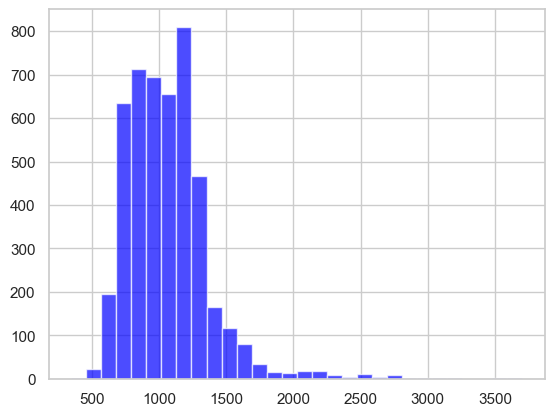

In [ ]:
# Plot histogram of word counts
import matplotlib.pyplot as plt
plt.hist(bbText['word_count'], bins=30, color='blue', alpha=0.7)

In [ ]:
# Describe word count by district
bbText.groupby('District')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
1,360.00,"1,090.22",328.42,475.00,773.75,"1,053.00","1,323.25","1,956.00"
2,362.00,"1,035.92",184.46,574.00,908.00,"1,029.00","1,186.75","1,534.00"
3,361.00,"1,043.20",216.71,564.00,869.00,"1,034.00","1,195.00","1,721.00"
4,362.00,"1,061.86",247.47,599.00,854.75,"1,073.50","1,233.75","1,649.00"
5,362.00,"1,087.69",315.55,554.00,775.75,"1,148.50","1,305.75","1,729.00"
6,362.00,958.50,176.87,556.00,824.00,911.50,"1,125.50","1,413.00"
7,362.00,"1,116.39",146.57,741.00,"1,006.00","1,116.50","1,219.00","1,595.00"
8,361.00,876.19,181.88,423.00,723.00,850.00,"1,005.00","1,289.00"
9,362.00,"1,045.34",206.07,347.00,893.00,"1,102.00","1,201.25","1,379.00"


In [ ]:
bbText['word_count'].describe()

count   4,700.00
mean    1,063.79
std       312.27
min       347.00
25%       843.00
50%     1,035.00
75%     1,212.00
max     3,702.00
Name: word_count, dtype: float64

<Axes: xlabel='Month'>

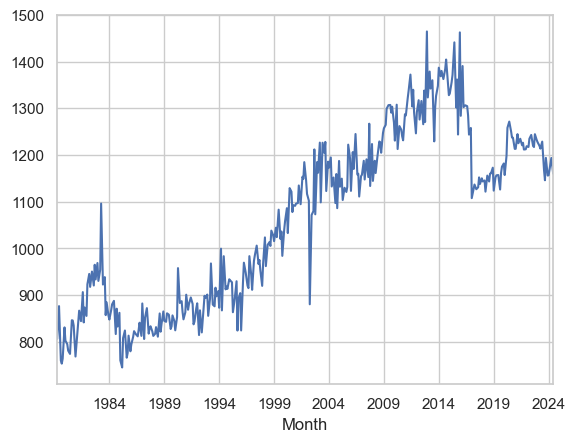

In [ ]:
# plot average word counts by month for all districts over time
bbText['Date'] = pd.to_datetime(bbText['Date'])
bbText['Month'] = bbText['Date'].dt.to_period('M')
bbText.groupby('Month')['word_count'].mean().plot()


In [ ]:
# Calculate average word count for 1970s, 1980s, 1990s, and 2000s, 2010s, and 2020s
bbText['Decade'] = bbText['Date'].dt.year // 10 * 10
bbText.groupby('Decade')['word_count'].mean()

Decade
1970     798.49
1980     850.48
1990     926.08
2000   1,162.18
2010   1,267.73
2020   1,213.49
Name: word_count, dtype: float64

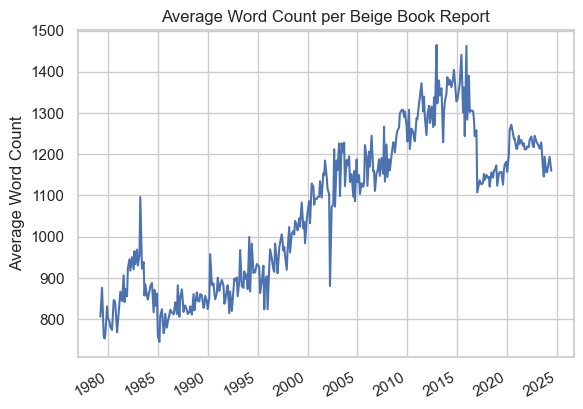

In [ ]:
# Plot average word counts per Beige Book report averaged across all districts
bbText.groupby('Date')['word_count'].mean().plot()
# Remove x label
plt.xlabel('')
plt.ylabel('Average Word Count')
plt.title('Average Word Count per Beige Book Report')

# Export as png
plt.savefig('word_count.png')
plt.show()
